In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
# import OS module
import os

In [42]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

def read_map_file(filename):
#     dataframe = pd.DataFrame(columns)
    
    data = {}
    prefix_to_remove = "method=processElement "
    prefix_to_remove2 = "method=onEventTime "
    with open(filename, 'r') as file:
        fileWrite = open(filename+'.csv', 'w', newline='')
        csv_writer = csv.DictWriter(fileWrite, fieldnames=['method', 'find_start', 'find_end', 'sate_size_items', 'state_size_windows', 'cumulative_merge', 'cumulative_add', 'cumulative_evict', 'cumulative_report', 'cumulative_emit', 'emit_start', 'emit_end', 'evict_start', 'evict_end'])
        csv_writer.writeheader()
        for line in file:
            fields = line.split(',')
            for field in fields:
                if field.startswith('method=processElement '):
                    field_spaced = remove_prefix(field,prefix_to_remove).strip()
                    key,value = field_spaced.split('=')
                    data[key] = int(value)
                    data['method'] = "processElement"
                elif field.startswith('method=onEventTime '):
                    field_spaced = remove_prefix(field,prefix_to_remove2).strip()
                    key,value = field_spaced.split('=')
                    data[key] = int(value)
                    data['method'] = "onEventTime"
                else: 
                    if len(field.split(' '))>1:
                        field = field.split(' ')[0]
                    field_spaced = field.strip()
                    key,value = field_spaced.split('=')
                    data[key] = int(value)
            csv_writer.writerow(data)
    return filename+'.csv'

In [66]:
dir_list = [filename for filename in os.listdir('./') if filename.startswith('metrics')]

metrics_list = [ pd.read_csv('./'+f) for f in dir_list]

# Get the current column names
column_names = metrics_list[0].columns.tolist()

# Define the index of the column to be renamed
index_to_rename = 0  # Assuming you want to rename the column at index 1

# Define the new name for the column
new_column_name = 'method'

# Update the column name at the specified index
column_names[index_to_rename] = new_column_name

# Assign the updated column names back to the DataFrame
metrics_list[0].columns = column_names

processElement_df = metrics_list[0][metrics_list[0]['method'].str.startswith('method=processElement ')]

processElement_df.columns = ['method', 'find_end', 'sate_size_items', 'state_size_windows', 'cumulative_merge', 'cumulative_add', 'cumulative_evict', 'cumulative_report', 'cumulative_emit']

processElement_df[['method', 'find_start']] = processElement_df['method'].str.split(expand=True)

# Get the column names
columns = processElement_df.columns.tolist()

# Reorder the columns, moving the last to the second position
new_order = columns[:-1]  # Exclude the last column
new_order.insert(1, columns[-1])  # Insert the last column at the second position


# Create a new DataFrame with the reordered columns
processElement_df = processElement_df[new_order]

processElement_df[['cumulative_emit', 'timestamp']] = processElement_df['cumulative_emit'].str.split(expand=True)


for column_name in processElement_df.columns:
    processElement_df[column_name] = processElement_df[column_name].str.lstrip(column_name+'=')


df = processElement_df

df 

,method,find_start,find_end,sate_size_items,state_size_windows,cumulative_merge,cumulative_add,cumulative_evict,cumulative_report,cumulative_emit,timestamp
0,processElement,1898890647458,1898890699625,2,1,66958,3459,1708,542,36875,1898890840375
1,processElement,1898890885125,1898890905458,3,1,15000,2791,1667,458,20708,1898890968958
2,processElement,1898891006666,1898891027333,4,1,13750,2500,1542,458,20250,1898891090250
3,processElement,1898891131500,1898891150833,5,1,13750,2375,1583,458,19875,1898891211041
4,processElement,1898891246000,1898891265375,6,1,16833,2417,1667,458,20292,1898891330125
...,...,...,...,...,...,...,...,...,...,...,...
412069,processElement,3120296421625,3120297107333,403992,8080,1286208,500,208,42,15458,3120302595416
412070,processElement,3120302929958,3120303624583,403993,8080,1315708,375,125,42,17583,3120309139333
412071,processElement,3120309513875,3120310197083,403994,8080,1284667,666,167,0,17500,3120315967125
412072,processElement,3120316183041,3120316969833,403995,8080,1289958,250,83,42,16541,3120322687958


In [75]:
df['cumulative_scope'] = df['find_end'].astype(int)-df['find_start'].astype(int)

In [86]:
df['state_size_windows'] = df['state_size_windows'].astype(int)
df['sate_size_items'] = df['sate_size_items'].astype(int)
d1 = df[['state_size_windows','cumulative_scope']]

In [87]:
d1 = d1.groupby('state_size_windows')['cumulative_scope'].mean().reset_index()

In [88]:
d1

,state_size_windows,cumulative_scope
0,1,67008.380000
1,2,19588.294118
2,3,14039.196078
3,4,12901.882353
4,5,11323.549020
...,...,...
8075,8076,708552.333333
8076,8077,712055.607843
8077,8078,715493.470588
8078,8079,718120.098039


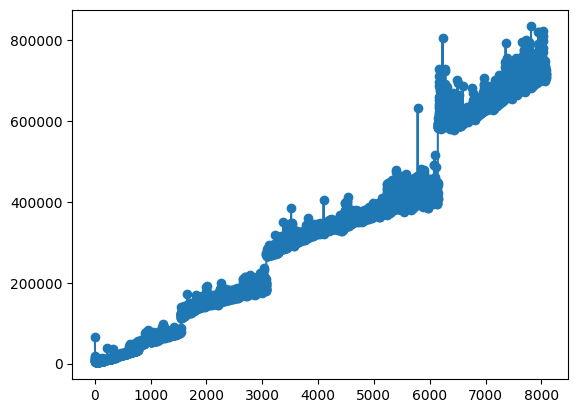

In [89]:
 plt.plot(d1['state_size_windows'], d1['cumulative_scope'], marker='o')

In [93]:
d2 = df.groupby('sate_size_items')['cumulative_emit'].mean().reset_index()

In [94]:
d2

,sate_size_items,cumulative_emit
0,2,36875.0
1,3,20708.0
2,4,20250.0
3,5,19875.0
4,6,20292.0
...,...,...
403990,403992,15458.0
403991,403993,17583.0
403992,403994,17500.0
403993,403995,16541.0


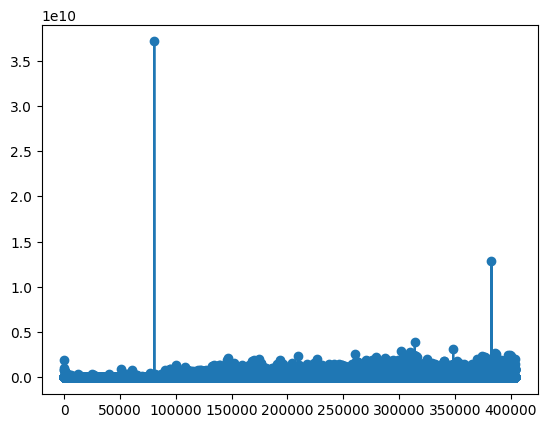

In [95]:
 plt.plot(d2['sate_size_items'], d2['cumulative_emit'], marker='o')

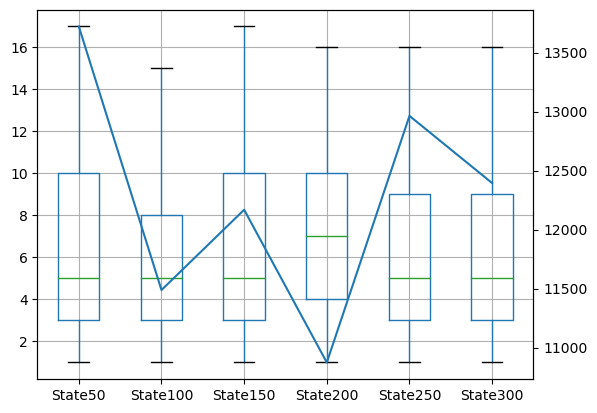

In [150]:
mean = result['Latency'].mean()
mean.index = np.arange(1,len(mean)+1)

_, ax = plt.subplots()

result[['State50','State100','State150','State200','State250','State300']].boxplot(showfliers=False, ax=ax)

mean.plot(ax=ax, secondary_y=True)

plt.savefig('SUMtests.png')
plt.show()


In [153]:
result.mean()

State50         6.575958
Latency     13720.706271
State100        6.003700
Latency     11488.141014
State150        6.446145
Latency     12168.401940
State200        7.036104
Latency     10874.517052
State250        6.156816
Latency     12963.543354
State300        6.178218
Latency     12394.144414
dtype: float64

['SUM50', 'SUM100', 'SUM150', 'SUM200', 'SUM250']

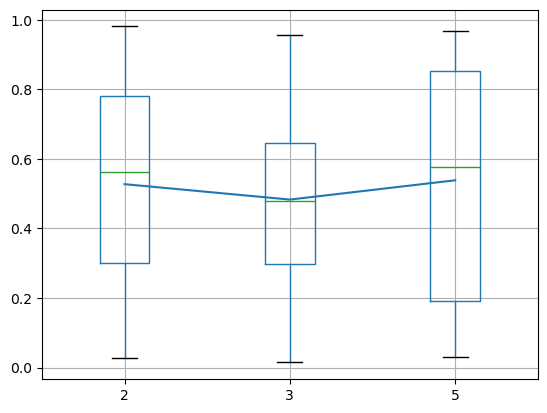

In [144]:
test_errors_dict = dict()
np.random.seed(40)

test_errors_dict[2] = np.random.rand(20)
test_errors_dict[3] = np.random.rand(20)
test_errors_dict[5] = np.random.rand(20)

df = pd.DataFrame(data=test_errors_dict)
df = df.astype(float)

mean = df.mean()
mean.index = np.arange(1,len(mean)+1)

_, ax = plt.subplots()
mean.plot(ax=ax)
df.boxplot(showfliers=False, ax=ax)

plt.show()

In [123]:
["SUM"+str(50*(i+1)) for i in range(len(mean))]

['SUM50', 'SUM100', 'SUM150', 'SUM200', 'SUM250', 'SUM300']